# Proyecto 1. Entrega 2.
# Algoritmos de Aprendizaje no Supervisado

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import bartlett
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

## 1. Clustering

### 1.1. Preprocesamiento del dataset

In [2]:
# Cargar el dataset
try:
    df = pd.read_csv('movies.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('movies.csv', encoding='latin-1')  
    except UnicodeDecodeError:
        df = pd.read_csv('movies.csv', encoding='utf-8', errors='replace')

# Eliminar columnas irrelevantes
drop_columns = ['id', 'originalTitle', 'title', 'homePage', 'actorsCharacter', 'video']
df = df.drop(columns=drop_columns)

# Codificación one-hot para variables categóricas
categorical_cols = ['originalLanguage', 'productionCompanyCountry']
df = pd.get_dummies(df, columns=categorical_cols)

# Normalización de variables numéricas
scaler = StandardScaler()
numerical_cols = ['popularity', 'budget', 'revenue', 'runtime', 'voteCount', 'voteAvg', 'actorsPopularity', 'actorsAmount', 'castWomenAmount', 'castMenAmount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount']
# Convertir a números y manejar errores
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Llenar NaN con la mediana
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Normalización
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


### 1.2. Análisis de tendencia al agrupamiento

In [3]:
def hopkins_statistic(X, sample_size=50):
    n, d = X.shape
    sample_indices = np.random.choice(n, sample_size, replace=False)
    random_points = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (sample_size, d))
    
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    distances_real, _ = nbrs.kneighbors(X[sample_indices], n_neighbors=1)
    distances_random, _ = nbrs.kneighbors(random_points, n_neighbors=1)
    
    H = np.sum(distances_random) / (np.sum(distances_real) + np.sum(distances_random))
    return H

H_stat = hopkins_statistic(df[numerical_cols].values)
print(f'Estadístico de Hopkins: {H_stat}')

Estadístico de Hopkins: 1.0


In [ ]:
# VAT (Visual Assessment of cluster Tendency)
Z = linkage(df[numerical_cols], method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('VAT - Visual Assessment of cluster Tendency')
plt.show()

### 1.3. Determinación del número óptimo de clústeres

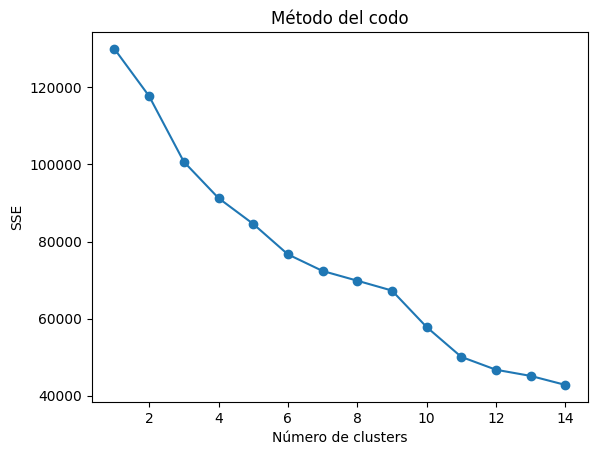

In [4]:
sse = []
k_values = range(1, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df[numerical_cols])
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

### 1.4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.

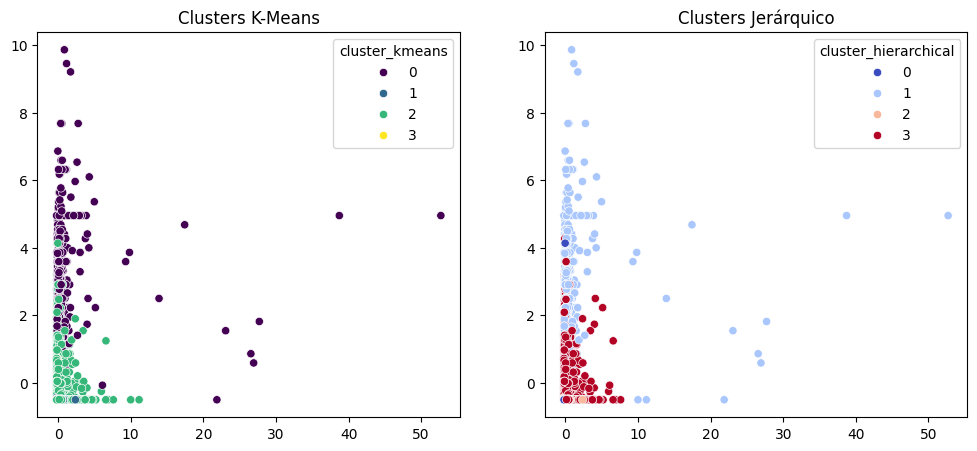

In [5]:
movies_numeric = df[numerical_cols].dropna()
movies_scaled = scaler.fit_transform(movies_numeric)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
movies_numeric["cluster_kmeans"] = kmeans.fit_predict(movies_scaled)

# Aplicar Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
movies_numeric["cluster_hierarchical"] = hierarchical.fit_predict(movies_scaled)

# Comparación de los clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=movies_scaled[:, 0], y=movies_scaled[:, 1], hue=movies_numeric["cluster_kmeans"], palette="viridis")
plt.title("Clusters K-Means")

plt.subplot(1, 2, 2)
sns.scatterplot(x=movies_scaled[:, 0], y=movies_scaled[:, 1], hue=movies_numeric["cluster_hierarchical"], palette="coolwarm")
plt.title("Clusters Jerárquico")

plt.show()

### 1.5. Evaluación de calidad con el método de la silueta

In [8]:
# Calcular la calidad del agrupamiento con el método de la silueta
silhouette_kmeans = silhouette_score(movies_scaled, movies_numeric["cluster_kmeans"])
silhouette_hierarchical = silhouette_score(movies_scaled, movies_numeric["cluster_hierarchical"])
print(f"Silhouette Score - K-Means: {silhouette_kmeans:.4f}")
print(f"Silhouette Score - Clustering Jerárquico: {silhouette_hierarchical:.4f}")

Silhouette Score - K-Means: 0.5019
Silhouette Score - Clustering Jerárquico: 0.4920


### 1.6. Interpretación de los grupos

### 3.2. Evaluación de la viabilidad del PCA

### 3.3. Análisis de Componentes Principales (PCA)